In [556]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import matplotlib.dates as mdates # type: ignore
import matplotlib.ticker as ticker # type: ignore
from matplotlib.axis import Axis # type: ignore
import datetime as dt
from datetime import datetime, date
#plt.style.use(['science', 'notebook'])
# %matplotlib inline

### Ce fichier est mis à jour par weather_bis.py sur pi4 dans terminal


In [557]:

csv_file1 = r"Y:\Documents\temp16122022.csv.old"
csv_file1 = r"Y:\Documents\temp03062024.csv"
csv_file2 = r"Z:\Documents\temp16122022.csv"


In [558]:

def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)


def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data

try:
    data = get_data(csv_file1)
except:
    data = get_data(csv_file2)
#data['heure'] = pd.to_datetime(data['time']).dt.strftime('%H:%M') #time
#data['jour'] = pd.to_datetime(data['time']).dt.strftime('%d/%m') #date
len(data)
data

,temp
0,13.19
1,12.20
2,12.29
3,12.42
4,14.54
...,...
8852,13.01
8853,13.01
8854,12.74
8855,12.14


In [559]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df

def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)


<Axes: >

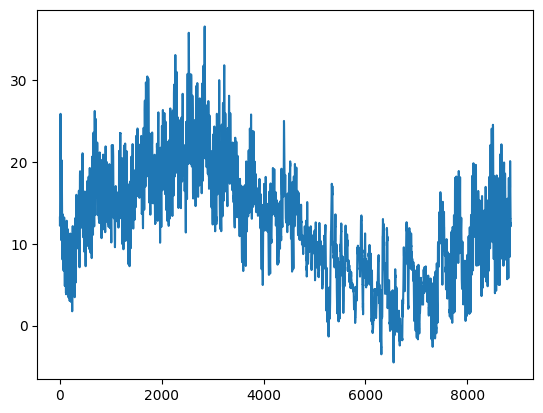

In [560]:
data['temp'].plot()

In [561]:
# convert string to datetime
date_time_str = '16/04/24 07:00:00'
ref = datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')
ref

datetime.datetime(2024, 4, 16, 7, 0)

In [562]:
then = ref + dt.timedelta(hours=len(data))
ref,then

(datetime.datetime(2024, 4, 16, 7, 0), datetime.datetime(2025, 4, 20, 8, 0))

In [563]:
len(data)

8857

In [564]:
date_time_str

'16/04/24 07:00:00'

In [565]:
def mk_date(date_time_str,data):
    # 
    ref = datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')
    then = ref + dt.timedelta(hours=len(data))
    return mdates.drange(ref,then,dt.timedelta(hours=1))


In [566]:
hours = mk_date(date_time_str,data)
hours
#len(hours)

array([19829.29166667, 19829.33333333, 19829.375     , ...,
       20198.20833333, 20198.25      , 20198.29166667], shape=(8857,))

In [567]:
dates = [datetime.strftime(h, '%d/%m/%y %H:%M:%S') for h in mdates.num2date(hours)]
#dates

In [568]:
if len(data)<len(hours):
    data['hours']=hours[:-1]
    data['dates']=dates[:-1]
else:
    data['hours']=hours
    data['dates']=dates

In [569]:
data[['dates','temp']]

,dates,temp
0,16/04/24 07:00:00,13.19
1,16/04/24 08:00:00,12.20
2,16/04/24 09:00:00,12.29
3,16/04/24 10:00:00,12.42
4,16/04/24 11:00:00,14.54
...,...,...
8852,20/04/25 03:00:00,13.01
8853,20/04/25 04:00:00,13.01
8854,20/04/25 05:00:00,12.74
8855,20/04/25 06:00:00,12.14


In [570]:
import warnings
warnings.filterwarnings("ignore")


In [571]:
temp= np.array(data['temp'])
len(temp)
#type(temp)
data,len(data)

(       temp         hours              dates
 0     13.19  19829.291667  16/04/24 07:00:00
 1     12.20  19829.333333  16/04/24 08:00:00
 2     12.29  19829.375000  16/04/24 09:00:00
 3     12.42  19829.416667  16/04/24 10:00:00
 4     14.54  19829.458333  16/04/24 11:00:00
 ...     ...           ...                ...
 8852  13.01  20198.125000  20/04/25 03:00:00
 8853  13.01  20198.166667  20/04/25 04:00:00
 8854  12.74  20198.208333  20/04/25 05:00:00
 8855  12.14  20198.250000  20/04/25 06:00:00
 8856  12.46  20198.291667  20/04/25 07:00:00
 
 [8857 rows x 3 columns],
 8857)

In [572]:
# data des 24 premieres heures
d_24 = data[:24]['temp']
#d_24


In [573]:
# moyenne des premieres 24 heures
m_day = d_24.mean()
m_day

np.float64(19.400000000000016)

In [574]:
# moyenne sur 24 heures depuis le 16/12/2022 9h
mean_all = []
window = 24
h_w = window//2
for l in range(len(data)-window):
    d_24 = data[l:l+window]['temp'].mean()
    mean_all.append(d_24)
x = data[:-window]['hours'].values    
len(mean_all)

8833

In [575]:
len(x)

8833

In [576]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))  #('%d/%m\n%H:%M'))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

Text(0.5, 1.0, 'Moyenne sur 24 heures sur 7 jours')

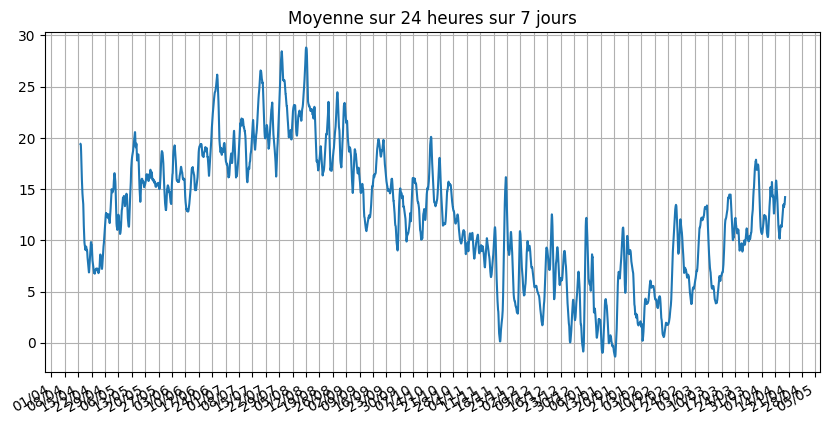

In [577]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.plot(x,mean_all, markersize=1)
jours = 7
format_date(jours*24) #10 jours x 24 h
plt.title(f'Moyenne sur 24 heures sur {jours} jours') #depuis le 16/12/2022')
#plt.grid()

In [578]:
today = datetime.now()
diff = today - ref
diff

datetime.timedelta(days=369, seconds=2812, microseconds=363763)

In [579]:
days = diff.days + diff.seconds/(24*3600)
days = int(days)


In [580]:
# moyenne depuis le 16/12/22
slice = int(days*24)
h = data.tail(slice).hours
t = data.tail(slice).temp
#h, t
ref,today,days


(datetime.datetime(2024, 4, 16, 7, 0),
 datetime.datetime(2025, 4, 20, 7, 46, 52, 363763),
 369)

In [581]:
moyenne = data['temp'].mean()
moyenne

np.float64(12.468543524895583)

np.float64(12.468543524895583)

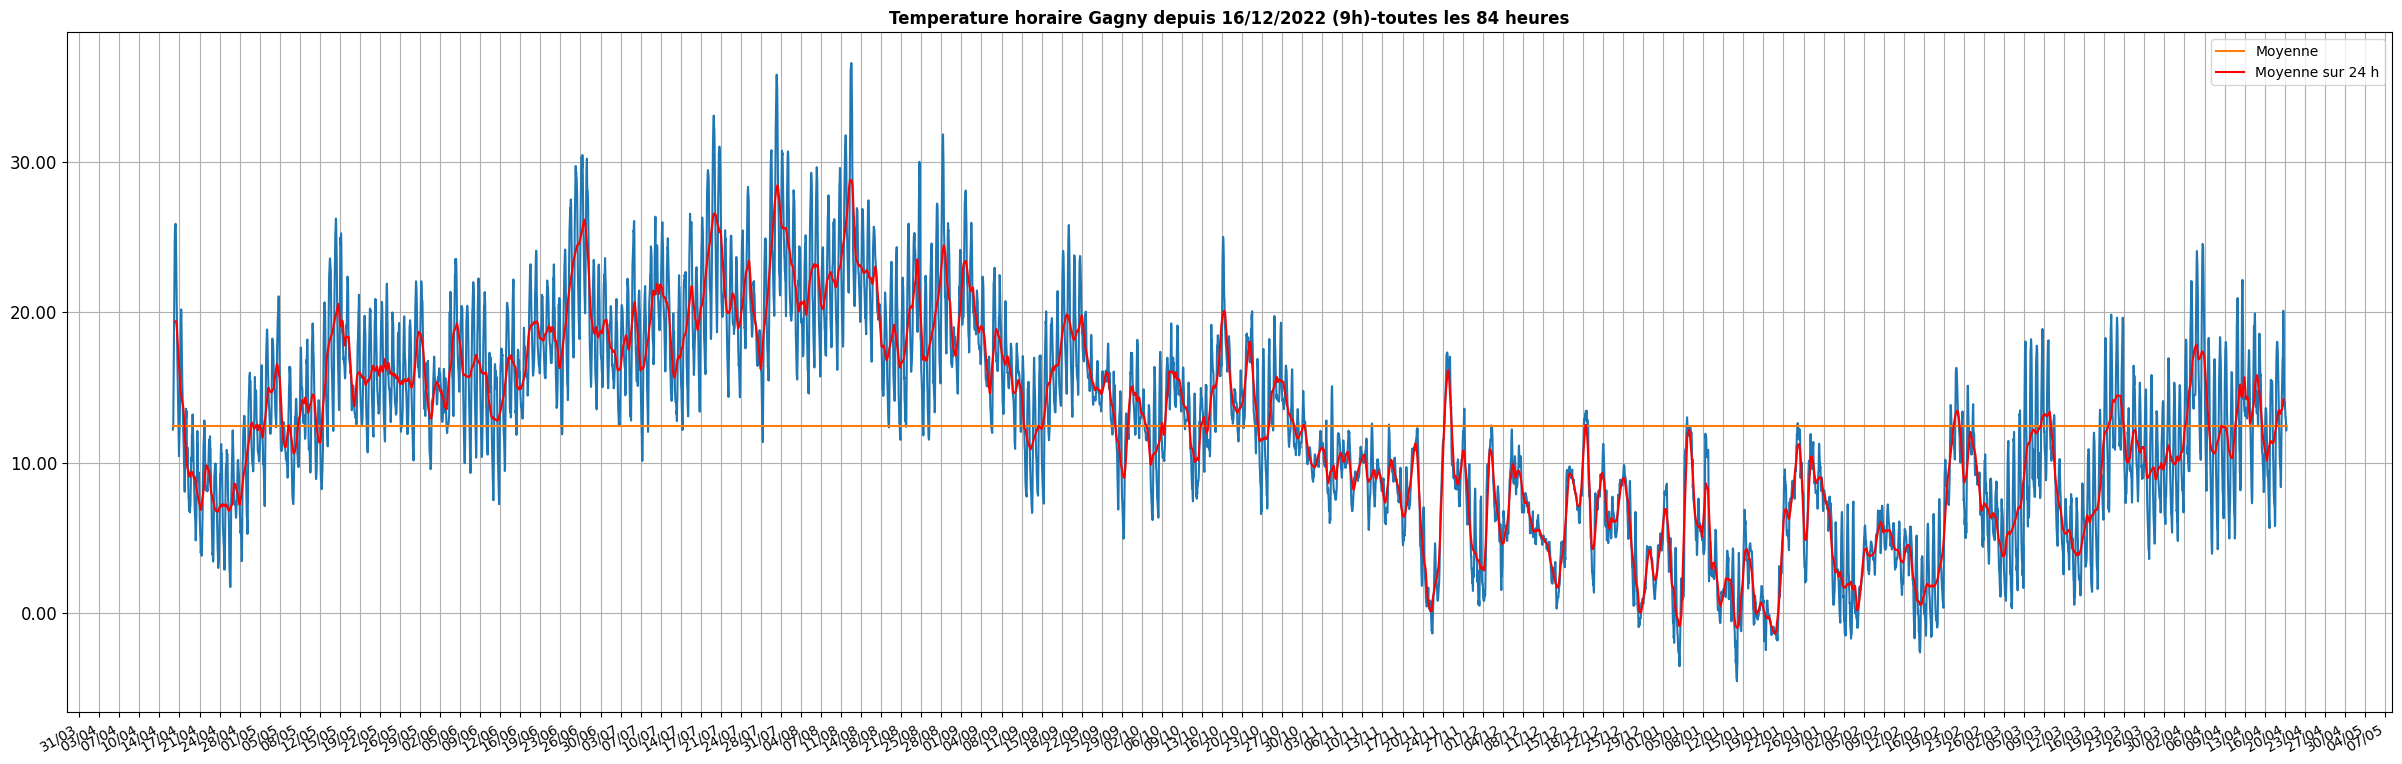

In [582]:
interval = 84
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
#plot = data['temp'].plot(figsize=(12,6))
plt.plot(h,t)
h1 = h.head(1)
h2 = h.tail(1)
plt.plot((h1,h2),(moyenne, moyenne),label='Moyenne')
plt.plot(hours[h_w:len(data)-h_w],mean_all,'r-',label=f'Moyenne sur {window} h')
#plt.plot(hours,temp)
plt.title(f"Temperature horaire Gagny depuis 16/12/2022 (9h)-toutes les {interval} heures",fontweight ='bold')


plt.legend()
#ax.set_xticks(hours)
ax.set_xticklabels(hours,fontsize=10)
#ax.set_yticks()
ax.set_yticklabels(temp,fontsize=12)

# Y_axis
formatter = ticker.FormatStrFormatter('%1.2f')
Axis.set_major_formatter(ax.yaxis, formatter)
format_date(84)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m:%H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=interval))
# plt.gcf().autofmt_xdate()
# plt.grid()
moyenne


In [583]:
data['variation']=data['temp'].diff()
data

,temp,hours,dates,variation
0,13.19,19829.291667,16/04/24 07:00:00,NaN
1,12.20,19829.333333,16/04/24 08:00:00,-0.99
2,12.29,19829.375000,16/04/24 09:00:00,0.09
3,12.42,19829.416667,16/04/24 10:00:00,0.13
4,14.54,19829.458333,16/04/24 11:00:00,2.12
...,...,...,...,...
8852,13.01,20198.125000,20/04/25 03:00:00,-0.55
8853,13.01,20198.166667,20/04/25 04:00:00,0.00
8854,12.74,20198.208333,20/04/25 05:00:00,-0.27
8855,12.14,20198.250000,20/04/25 06:00:00,-0.60


<Axes: >

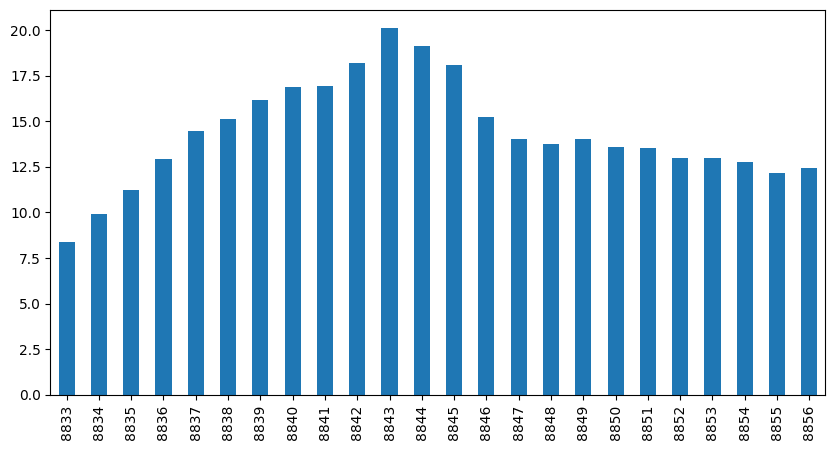

In [584]:
data.tail(24)['temp'].plot.bar(figsize=(10,5))

In [585]:
data

,temp,hours,dates,variation
0,13.19,19829.291667,16/04/24 07:00:00,NaN
1,12.20,19829.333333,16/04/24 08:00:00,-0.99
2,12.29,19829.375000,16/04/24 09:00:00,0.09
3,12.42,19829.416667,16/04/24 10:00:00,0.13
4,14.54,19829.458333,16/04/24 11:00:00,2.12
...,...,...,...,...
8852,13.01,20198.125000,20/04/25 03:00:00,-0.55
8853,13.01,20198.166667,20/04/25 04:00:00,0.00
8854,12.74,20198.208333,20/04/25 05:00:00,-0.27
8855,12.14,20198.250000,20/04/25 06:00:00,-0.60


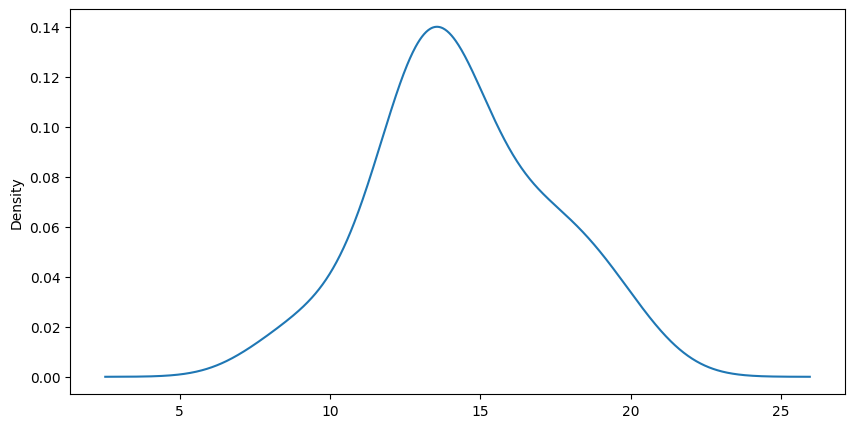

In [586]:
span = 24
try:
    data.tail(span)['temp'].plot.kde(figsize=(10,5))
    #data['temp'].plot.kde(figsize=(10,5))
except:
    pass

<Axes: ylabel='Frequency'>

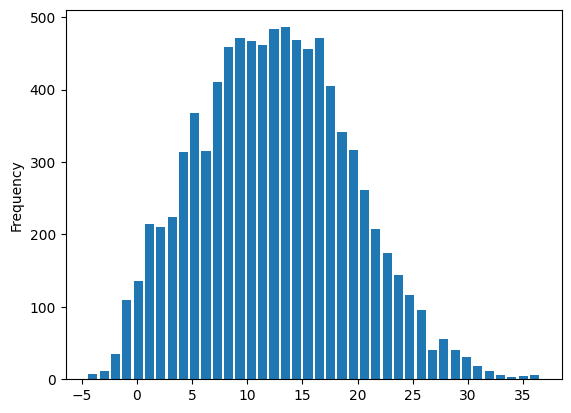

In [587]:
data['temp'].plot.hist(bins=40,rwidth=0.8) #,histtype='step')


<Axes: ylabel='Density'>

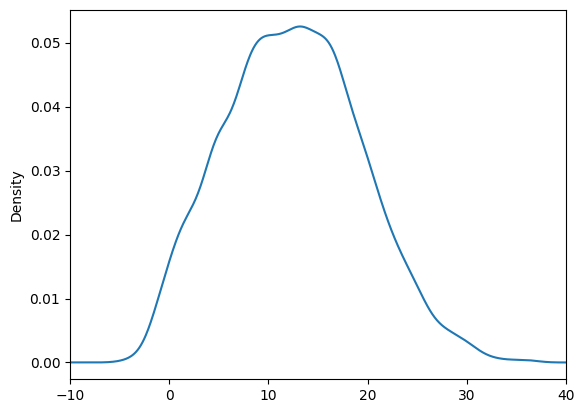

In [588]:
data['temp'].plot.kde(xlim=(-10,40)) #,logy=True)

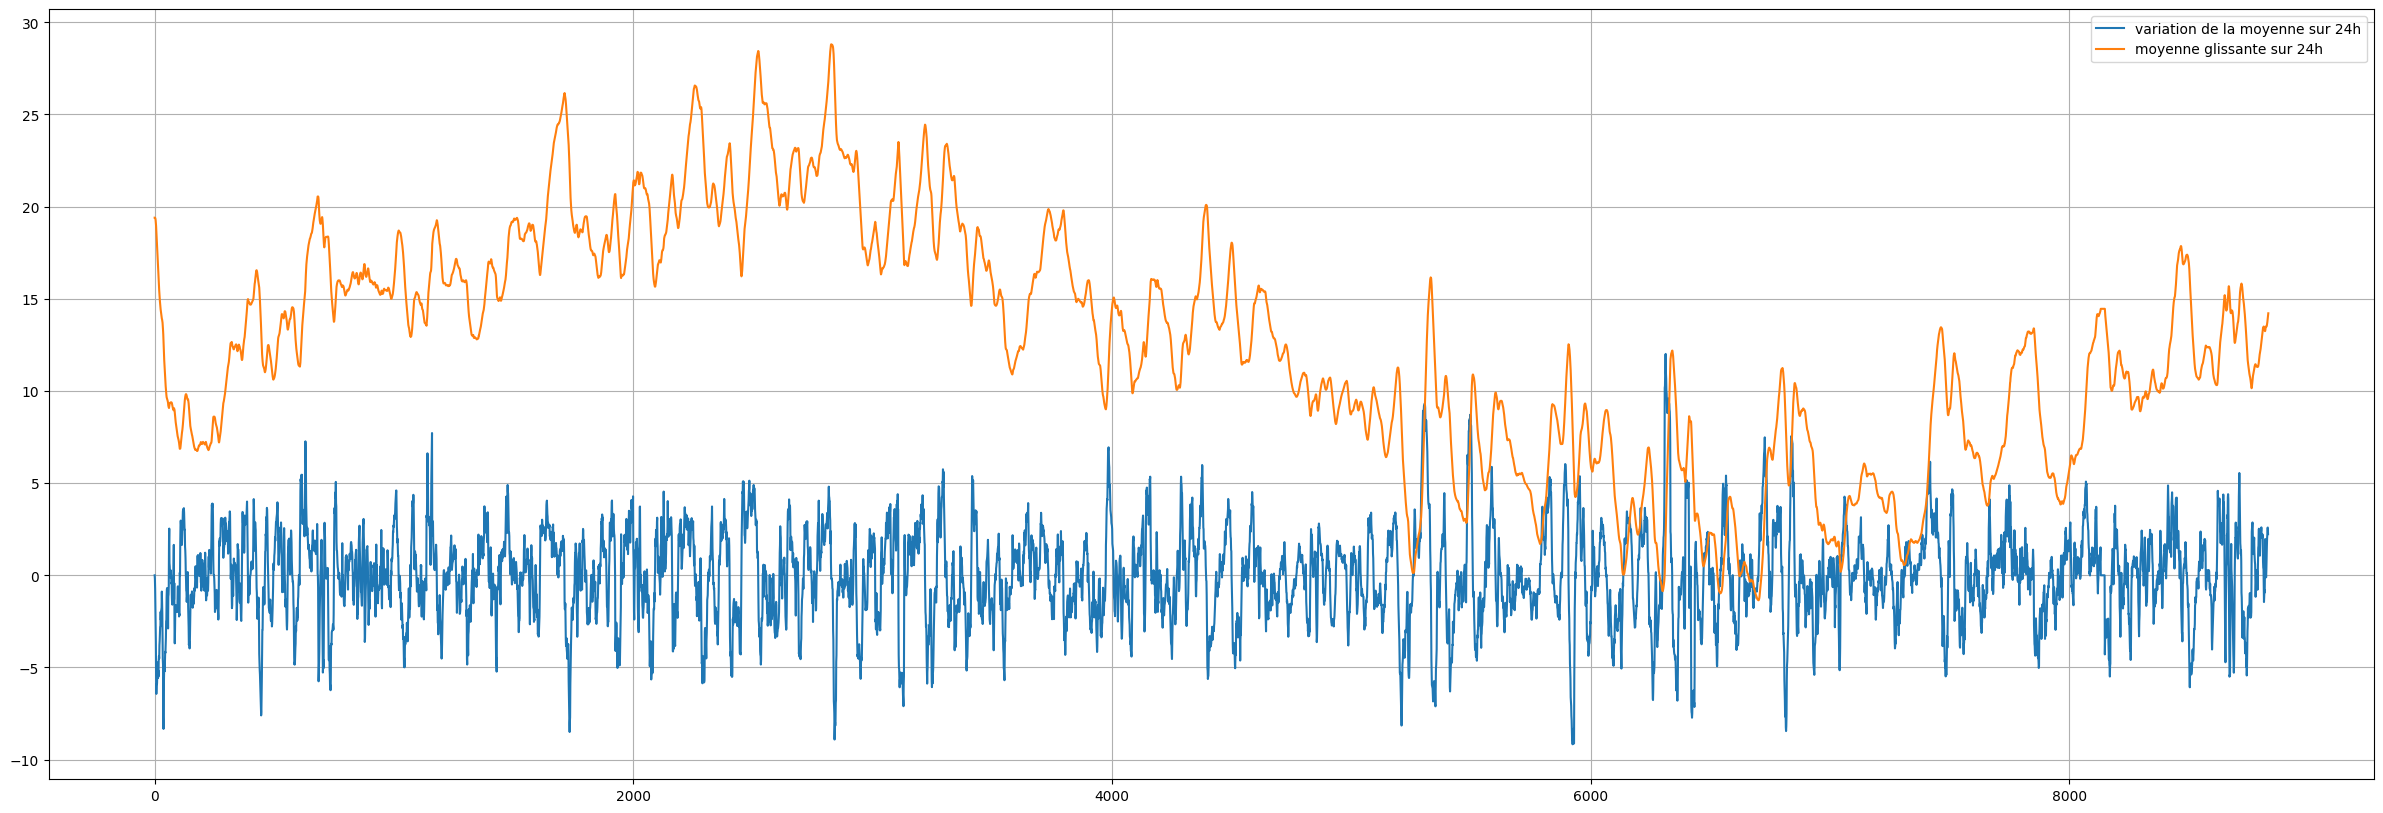

In [589]:
# variation horaire
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
delta = np.diff(mean_all)
facteur = 20   # amplifie la variation delta
plt.plot(facteur*delta,label='variation de la moyenne sur 24h')
plt.plot(mean_all,label='moyenne glissante sur 24h')
plt.legend()
plt.grid()

## Définir une fenêtre de visualisation : days

In [590]:
# fenetre de visualisation
days = 15
#days = int(len(data)/24)  # sur toute la liste de data


# xAxis interval
if days>30:
    interval = 72
elif days>15:
    interval = 24
elif days>7:
    interval = 12
else:
    interval = 6


In [591]:
window, days, interval

(24, 15, 12)

In [592]:
# moyenne avec une fenetre de 24h (window) calculé sur le nombre de jours=days 
mean_days = []
max_days = []
min_days = []
ecart_days = []

slice = int(days*24) # last days
#hours[-slice:],temp[-slice:]
h = data.tail(slice).hours
t = data.tail(slice).temp
#h.iloc[0]
start = datetime.now() - dt.timedelta(days=days)
window_start = start.strftime("%d/%m/%Y, %H:%M:%S")

#window = 24
#h_w = int(window/2)
for l in range(len(t)-window):
    d_24 = t[l:l+window].mean()
    M_24 = t[l:l+window].max()
    m_24 = t[l:l+window].min()
    mean_days.append(d_24)
    max_days.append(M_24)
    min_days.append(m_24)
    ecart_days.append(M_24-m_24)
moyenne = t.mean()
#moyenne  # moyenne sur la fenetre de visualisation
len(h[:-24]),len(max_days), len(min_days),len(ecart_days),window

(336, 336, 336, 336, 24)

In [593]:
h

8497    20183.333333
8498    20183.375000
8499    20183.416667
8500    20183.458333
8501    20183.500000
            ...     
8852    20198.125000
8853    20198.166667
8854    20198.208333
8855    20198.250000
8856    20198.291667
Name: hours, Length: 360, dtype: float64

In [594]:
datetime.now()

datetime.datetime(2025, 4, 20, 7, 46, 59, 402820)

In [595]:
window_start

'05/04/2025, 07:46:59'

In [596]:
def select(days):
    # moyenne sur la fenetre days
    mean_days = []
    max_days = []
    min_days = []
    ecart_days = []
    # fenetre de visualisation
    #days = int(len(data)/24)  # sur toute la liste de data
    #days = 30
    slice = int(days*24) # last days
    #hours[-slice:],temp[-slice:]
    h = data.tail(slice).hours
    t = data.tail(slice).temp
    #h.iloc[0]
    #start = datetime.now() - dt.timedelta(days=days)
    #window_start = start.strftime("%d/%m/%Y, %H:%M:%S")
    
    #window = 24
    #h_w = int(window/2)
    for l in range(len(t)-window):
        d_24 = t[l:l+window].mean()
        M_24 = t[l:l+window].max()
        m_24 = t[l:l+window].min()
        ecart_days.append(M_24 - m_24)
        mean_days.append(d_24)
        max_days.append(M_24)
        min_days.append(m_24)
    moyenne = t.mean()
    #moyenne  # moyenne sur la fenetre de visualisation
    return mean_days,max_days,min_days,ecart_days,moyenne


mean_d,max_d,min_d,ecart_d,moyenne = select(days)
moyenne

np.float64(12.990805555555577)

In [597]:
mean_d,max_d,min_d,ecart_d,moyenne = select(15)
len(mean_d),moyenne

(336, np.float64(12.990805555555577))

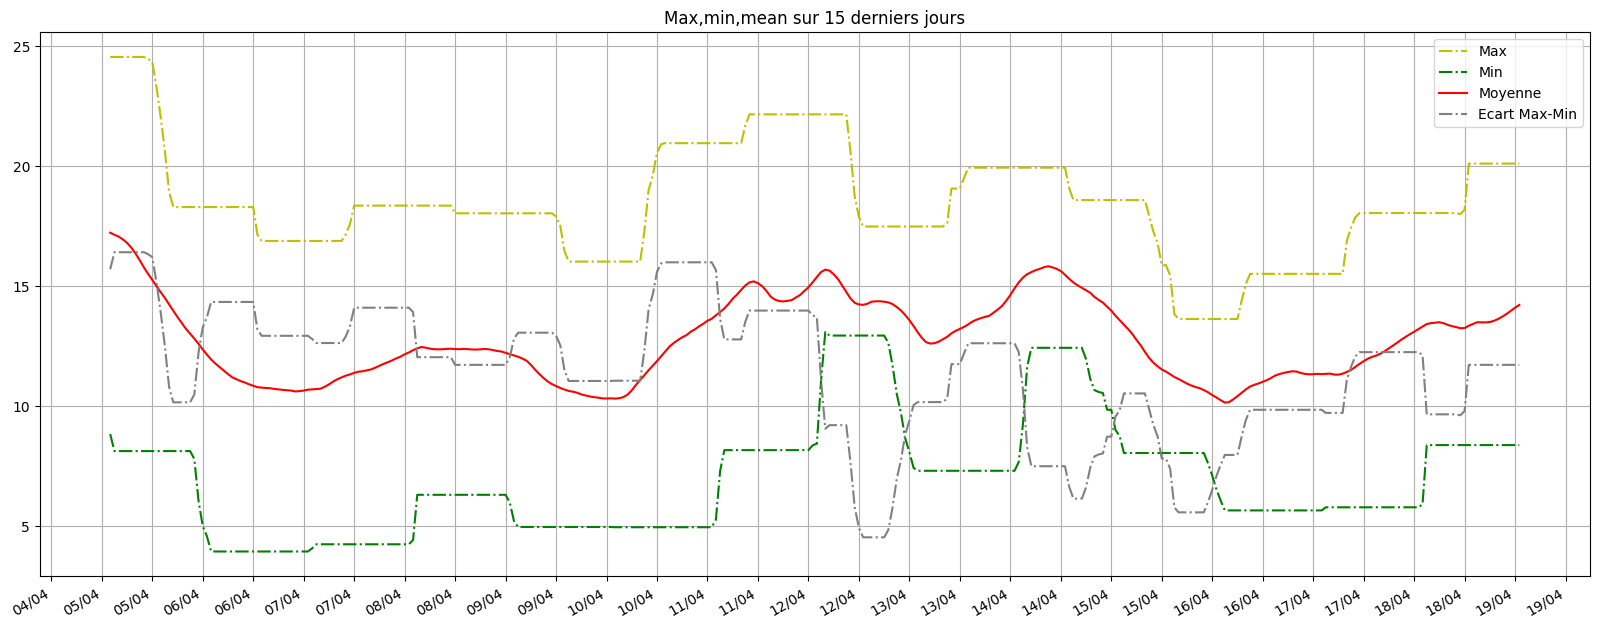

In [598]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 8)
x = h[:-24]
plt.title(f"Max,min,mean sur {days} derniers jours")
plt.plot(x,max_days,"y-.",label="Max")
plt.plot(x,min_days,"g-.",label="Min")
plt.plot(x,mean_days,'r',label="Moyenne")
plt.plot(x,ecart_days,'-.',color='grey',label="Ecart Max-Min")
#plt.plot(t[l:l+window])
format_date(interval)
plt.legend()

In [599]:
#delta = [j-i for i, j in zip(mean_week[:-1], mean_week[1:])]
delta = np.diff(mean_days)
#delta

## Delta/days des moyennes 24h avec un glissement d'une heure

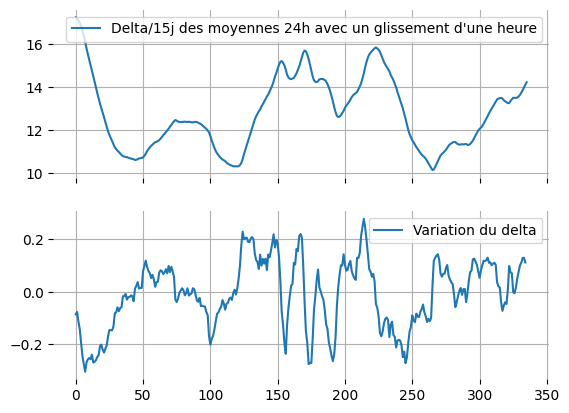

In [600]:
#fig,ax =plt.subplots(nrows=2)
#fig,ax =plt.subplots(nrows=2, sharex=True)
fig,ax =plt.subplots(nrows=2, sharex=True, subplot_kw=dict(frameon=False))
ax[0].plot(mean_days,label='Delta/'+str(days)+'j des moyennes 24h avec un glissement d\'une heure')
ax[1].plot(delta,label=('Variation du delta'))
ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()


In [601]:
def local_min_max(liste):
    """
    Trouve les minima et maxima locaux d'une liste.

    Args:
    liste: La liste à analyser.

    Returns:
    Les listes max et min.
    """

    max = []
    min = []

    if liste[0] > liste[1]:
        max.append(liste[0])
    elif liste[0] <= liste[1] :
        min.append(liste[0])

    for i in range(1, len(liste) - 1):
        if liste[i] > liste[i - 1] and liste[i] >= liste[i + 1]:
            max.append(liste[i])
        elif liste[i] <= liste[i - 1] and liste[i] < liste[i + 1]:
            min.append(liste[i])

    return max, min


liste = [10, 11, 15, 12, 9, 7, 8, 10, 13, 15, 18, 16, 12, 10, 7, 5, 6, 11, 14, 14]
max, min = local_min_max(liste)

max,min

([15, 18, 14], [10, 7, 5])

In [602]:
# graphical output...
from pylab import sign, diff # type: ignore


In [603]:
# plot graph with local max and min
def plot_data(x,data,lw=3):
    # find the indexes of maximas and the minimas
    #a = diff(sign(diff(data))).nonzero()[0] + 1 # local min+max
    b = (diff(sign(diff(data))) > 0).nonzero()[0] + 1 # local min
    c = (diff(sign(diff(data))) < 0).nonzero()[0] + 1 # local max
    print(b,len(b),c,len(c))
    # plot the curve
    plt.plot(x,data,lw=lw)
    #plot the maximas
    for v in b:
        plt.plot(x[v], data[v], "ob")
    #plot the minimas
    for v in c:
        plt.plot(x[v], data[v], "or")
    plt.grid()


[ 5 15] 2 [ 2 10 18] 3


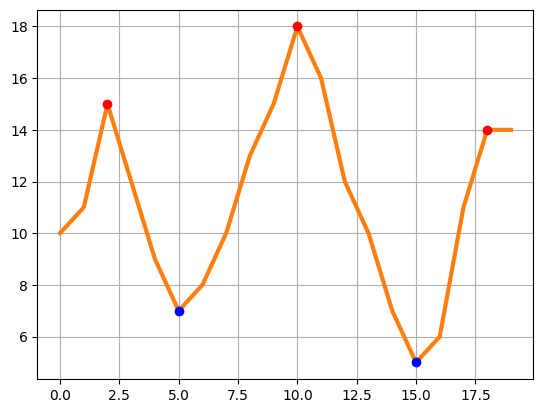

In [604]:
x = range(len(liste))
plt.plot(liste)
plot_data(x,liste)

In [605]:
jours = 7
data['heures']=[k.split(' ')[1].split(':')[0] for k in data.dates]
data['jours']=[k.split(' ')[0] for k in data.dates]

data.tail(24*jours)[['jours','heures','temp','variation']]

,jours,heures,temp,variation
8689,13/04/25,08,13.40,-0.25
8690,13/04/25,09,13.42,0.02
8691,13/04/25,10,12.94,-0.48
8692,13/04/25,11,13.17,0.23
8693,13/04/25,12,13.64,0.47
...,...,...,...,...
8852,20/04/25,03,13.01,-0.55
8853,20/04/25,04,13.01,0.00
8854,20/04/25,05,12.74,-0.27
8855,20/04/25,06,12.14,-0.60


In [606]:
_min = round(data.tail(24*jours).temp.min(),2)
_max = round(data.tail(24*jours).temp.max(),2)

In [607]:
_max - _min

np.float64(14.440000000000001)

In [608]:
window_start

'05/04/2025, 07:46:59'

## Main graph

(np.float64(12.990805555555577), 15)

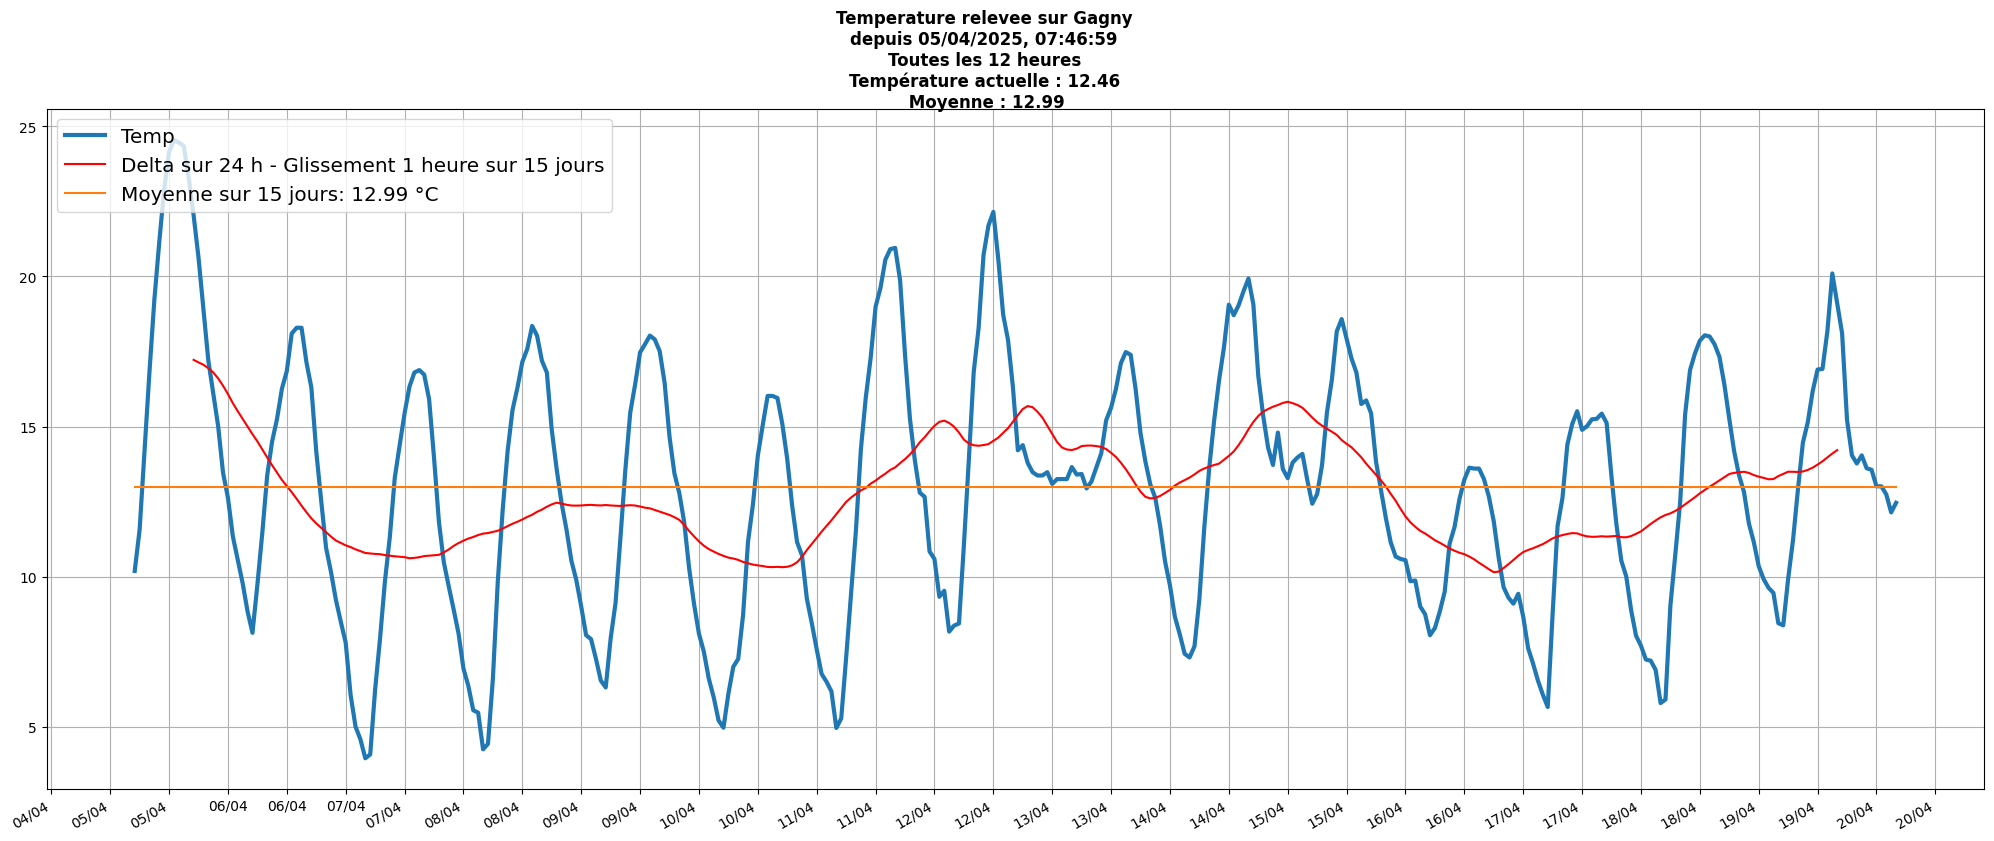

In [609]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
ax.set_xticklabels(hours,fontsize=10)
fig.suptitle(f"Temperature relevee sur Gagny\n\
depuis {window_start}\n\
Toutes les {interval} heures\nTempérature actuelle : {round(t.tail(1).values[0],2)}\n Moyenne : {round(moyenne,2)}", fontsize = 12, fontweight ='bold') 
#ax.xaxis.set_major_locator(mdates.DayLocator()) 
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(range(0, 24, interval))) #interval=6))
# plt.gcf().autofmt_xdate()
format_date(interval)
plt.plot(h,t,label='Temp',lw=3)
plt.plot(h[h_w:len(t)-h_w],mean_days,'r-',label=f'Delta sur {window} h - Glissement 1 heure sur {days} jours')
h1 = h.head(1)
h2 = h.tail(1)
moy = round(moyenne,2)
plt.plot((h1,h2),(moyenne, moyenne),label=f'Moyenne sur {days} jours: {moy} °C')
#plt.grid()
plt.legend(loc=2,fontsize='x-large')
#plt.title('Current temp : '+str(current.temp)+' °C')

moyenne,days

In [610]:
data.tail(5)[['heures','temp','variation']]

,heures,temp,variation
8852,03,13.01,-0.55
8853,04,13.01,0.00
8854,05,12.74,-0.27
8855,06,12.14,-0.60
8856,07,12.46,0.32


In [611]:
def area(df,dx=1):
    return (sum(df[:len(df)-1])+sum(df[1:len(df)]))*dx/2
df=[0,1]
area(df,1)

0.5

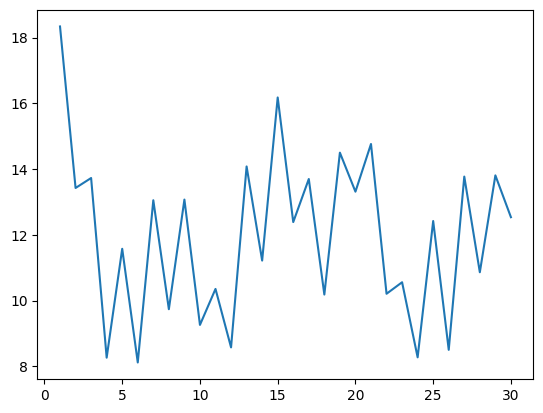

In [612]:
s = list(t)
# area under temperature
a=[]
for k in range(0,len(s),h_w):
    a.append(area(s[k:k+h_w])/h_w)
x = np.array(range(1,len(a)+1))
plt.plot(x,a)

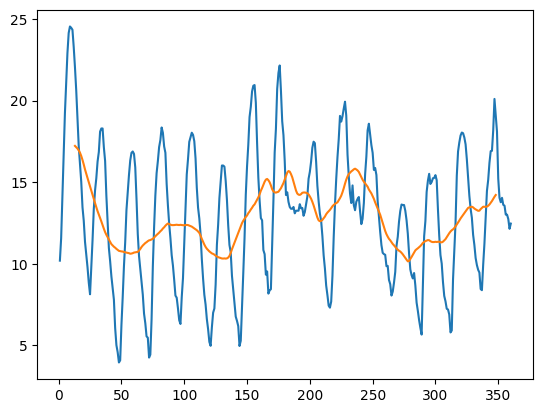

In [613]:
x = np.array(range(1,len(t)+1))
area(t)

plt.plot(x,t)
plt.plot(x[h_w:len(x)-h_w],mean_days)

(1.9500000000000002, [<matplotlib.lines.Line2D at 0x2cc27b802d0>])

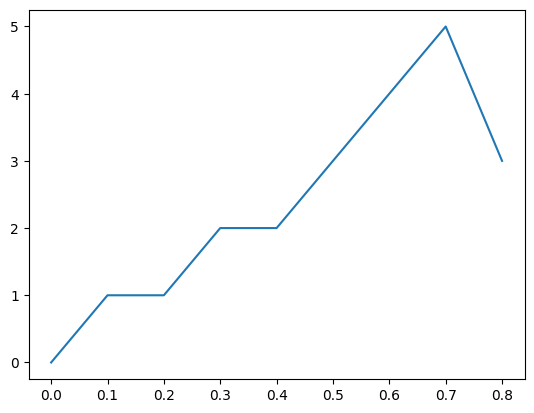

In [614]:
df = [0,1,1,2,2,3,4,5,3]
dx = .1
x = np.array(range(len(df)))
area(df,dx),plt.plot(x*dx,df)


(-0.35000000000000003, [<matplotlib.lines.Line2D at 0x2cc203ad450>])

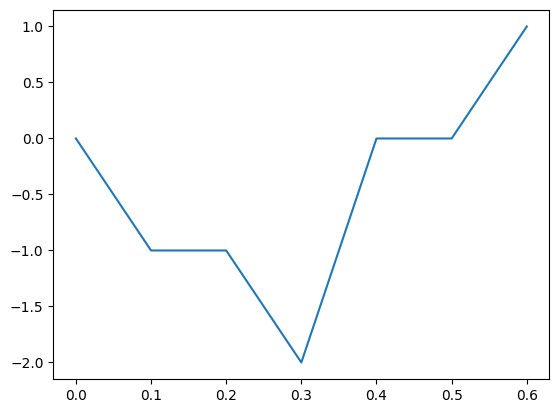

In [615]:
# valeurs négatives
dx = 0.1
df = [0,-1,-1,-2,0,0,1]
x = np.array(range(len(df)))
area(df,dx),plt.plot(x*dx,df)

In [616]:
n = data.tail(1)['dates'].values[0]
n

'20/04/25 07:00:00'

# Température depuis 7 jours par heure

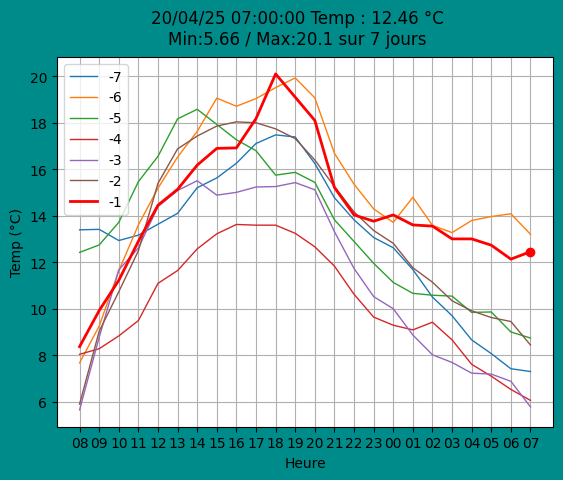

In [617]:
# courbes de température superposées des derniers 7 jours
fig, ax = plt.subplots(facecolor='darkcyan')
lw = 1
for t in range(jours,0,-1):
    #if t==1: lw=4
    if t==1:
        plt.plot(data.tail(24*t).heures.head(24),data.tail(24*t).temp.head(24),lw=lw+1,label=-t,c='red')
        
    else:
        plt.plot(data.tail(24*t).heures.head(24),data.tail(24*t).temp.head(24),lw=lw,label=-t)
plt.plot(data.tail(1).heures,data.tail(1).temp,'ro')
fig.suptitle(f"{n} Temp : {round(data.tail(1).temp.values[0],2)} °C\nMin:{_min} / Max:{_max} sur {jours} jours")
plt.xlabel(f"Heure")
plt.ylabel("Temp (°C)")
plt.grid()
plt.legend()
plt.show()

In [618]:
max_, min_ = np.max(list(data.tail(24*t).temp.head(24))), np.min(list(data.tail(24*t).temp.head(24)))

In [619]:
max_,min_

(np.float64(20.100000000000023), np.float64(8.379999999999995))

In [620]:
df_jours=data.tail(24*7)
df

[0, -1, -1, -2, 0, 0, 1]

In [621]:
df_jours.groupby('jours')['temp'].mean()

jours
13/04/25    14.855625
14/04/25    13.718333
15/04/25    14.828750
16/04/25    10.939167
17/04/25    11.421667
18/04/25    12.408333
19/04/25    13.504583
20/04/25    13.071250
Name: temp, dtype: float64

<Axes: xlabel='jours'>

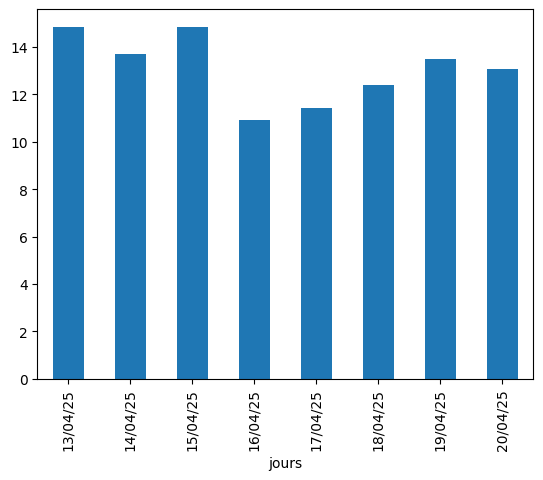

In [622]:
df_jours.groupby('jours')['temp'].mean().plot(kind='bar')

In [623]:
# save to csv    
csv_file = r"data_temp16122022.csv"
to_csv(csv_file, data)

In [624]:
# how to stop here

class StopExecution(Exception):
    def _render_traceback_(self):
        return []
#raise StopExecution

#raise
#assert(False)
#raise KeyboardInterrupt
#ext  # create an error

import this
#dir(list)
#dir(str)

# how to label on top of a bar plot

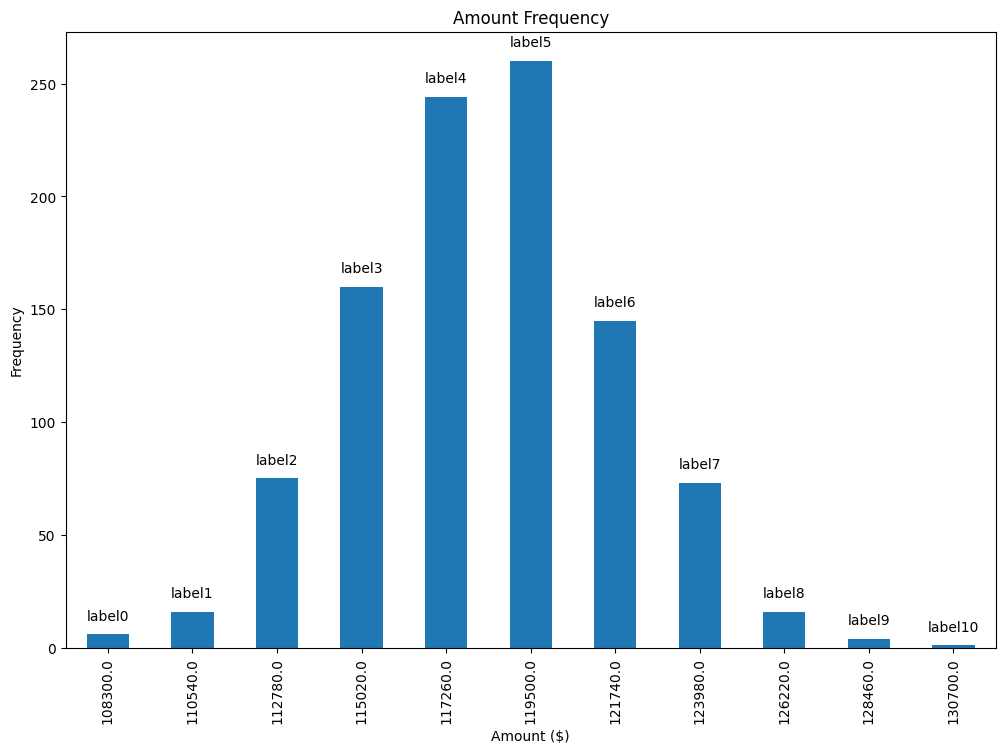

In [625]:
# Bring some raw data.
frequencies = [6, 16, 75, 160, 244, 260, 145, 73, 16, 4, 1]
# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)

x_labels = [
    108300.0,
    110540.0,
    112780.0,
    115020.0,
    117260.0,
    119500.0,
    121740.0,
    123980.0,
    126220.0,
    128460.0,
    130700.0,
]

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind="bar")
ax.set_title("Amount Frequency")
ax.set_xlabel("Amount ($)")
ax.set_ylabel("Frequency")
ax.set_xticklabels(x_labels)

rects = ax.patches

# Make some labels.
labels = [f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

In [626]:
areas = []
moys = []
x = []
for t in range(jours,0,-1):
    x.append(-t)
    a = area(data.tail(24*t+1).temp.head(25))    # calcul sur 24h
    areas.append(round(a/24,2))
    moys.append(round(data.tail(24*t+1).temp.head(25).mean(),2))
    #print(-t,a)
#print(areas,x)
len(data.tail(24*t+1)),moys

(25,
 [np.float64(13.09),
  np.float64(14.84),
  np.float64(13.56),
  np.float64(10.19),
  np.float64(11.12),
  np.float64(13.02),
  np.float64(14.14)])

In [627]:
data

,temp,hours,dates,variation,heures,jours
0,13.19,19829.291667,16/04/24 07:00:00,NaN,07,16/04/24
1,12.20,19829.333333,16/04/24 08:00:00,-0.99,08,16/04/24
2,12.29,19829.375000,16/04/24 09:00:00,0.09,09,16/04/24
3,12.42,19829.416667,16/04/24 10:00:00,0.13,10,16/04/24
4,14.54,19829.458333,16/04/24 11:00:00,2.12,11,16/04/24
...,...,...,...,...,...,...
8852,13.01,20198.125000,20/04/25 03:00:00,-0.55,03,20/04/25
8853,13.01,20198.166667,20/04/25 04:00:00,0.00,04,20/04/25
8854,12.74,20198.208333,20/04/25 05:00:00,-0.27,05,20/04/25
8855,12.14,20198.250000,20/04/25 06:00:00,-0.60,06,20/04/25


In [628]:
areas


[13.2, 15.03, 13.67, 10.3, 11.34, 13.26, 14.3]

[Text(-8.0, 0, '-7'),
 Text(-7.0, 0, '-6'),
 Text(-6.0, 0, '-5'),
 Text(-5.0, 0, '-4'),
 Text(-4.0, 0, '-3'),
 Text(-3.0, 0, '-2'),
 Text(-2.0, 0, '-1'),
 Text(-1.0, 0, ''),
 Text(0.0, 0, '')]

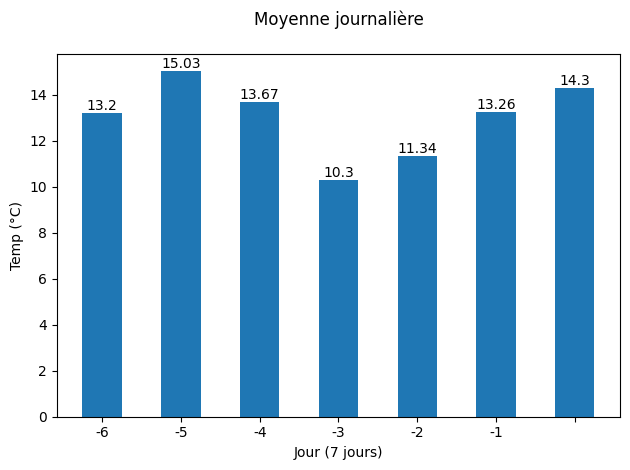

In [629]:
X_axis = np.arange(len(x))-7
fig, ax = plt.subplots()
plt.title("Moyenne journalière\n")
plt.xlabel("Jour (7 jours)")
plt.ylabel("Temp (°C)")
#plt.plot(x,areas,"r")
plt.bar(X_axis,areas,width=0.5)
fig.tight_layout()
# plt.bar(X_axis-0.3,areas,width=0.1)
# plt.bar(X_axis+0.3,moys,width=0.1)
rects = ax.patches

# Make some labels.
labels = [rects[i].get_height() for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    offset = sign(label)*0.1-0.1
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + offset, label, ha="center", va="bottom"
    )
ax.set_xticklabels(X_axis)


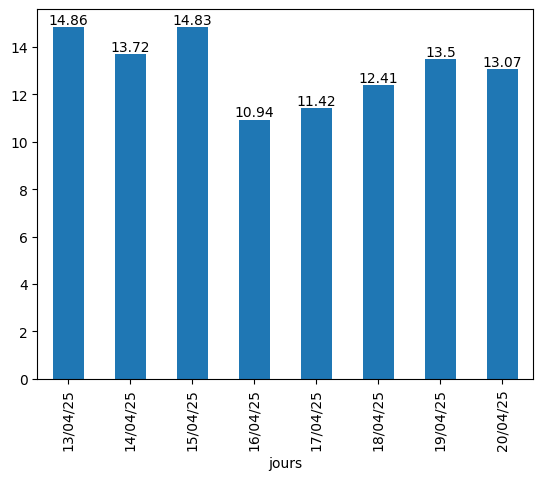

In [630]:
fig, ax = plt.subplots()
df_jours.groupby('jours')['temp'].mean().plot(kind='bar')
rects = ax.patches

# Make some labels.
labels = [round(rects[i].get_height(),2) for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    offset = sign(label)*0.1-0.1
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + offset, label, ha="center", va="bottom"
    )


In [631]:
labels

[np.float64(14.86),
 np.float64(13.72),
 np.float64(14.83),
 np.float64(10.94),
 np.float64(11.42),
 np.float64(12.41),
 np.float64(13.5),
 np.float64(13.07)]

In [632]:
df = list(data.tail(24).temp.head(24))
df,area(df)

([8.379999999999995,
  9.930000000000009,
  11.230000000000018,
  12.910000000000023,
  14.460000000000036,
  15.140000000000043,
  16.180000000000007,
  16.900000000000034,
  16.920000000000016,
  18.180000000000007,
  20.100000000000023,
  19.100000000000023,
  18.100000000000023,
  15.220000000000027,
  14.04000000000002,
  13.77000000000004,
  14.04000000000002,
  13.610000000000014,
  13.560000000000002,
  13.010000000000048,
  13.010000000000048,
  12.740000000000007,
  12.140000000000043,
  12.460000000000036],
 334.71000000000055)

In [633]:
moy = []
for i in range(len(df)-1):
    moy.append((df[i]+df[i+1])/2)
sum(moy)

334.71000000000055

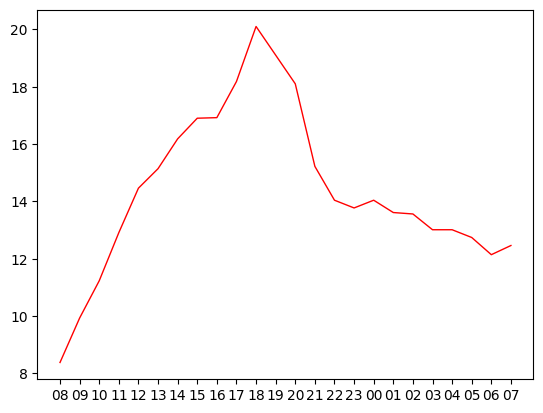

In [634]:
plt.plot(data.tail(24).heures.head(24),data.tail(24).temp.head(24),lw=lw,label=-t,c='red')

In [635]:
data.tail()


,temp,hours,dates,variation,heures,jours
8852,13.01,20198.125000,20/04/25 03:00:00,-0.55,03,20/04/25
8853,13.01,20198.166667,20/04/25 04:00:00,0.00,04,20/04/25
8854,12.74,20198.208333,20/04/25 05:00:00,-0.27,05,20/04/25
8855,12.14,20198.250000,20/04/25 06:00:00,-0.60,06,20/04/25
8856,12.46,20198.291667,20/04/25 07:00:00,0.32,07,20/04/25


In [636]:
chop = data.tail(24).temp
_max, _min = local_min_max(list(chop))
_max,_min,len(_max),len(_min)

([20.100000000000023, 14.04000000000002],
 [8.379999999999995, 13.77000000000004, 12.140000000000043],
 2,
 3)

In [637]:
_diff=[M-m for M,m in zip(_max, _min)]

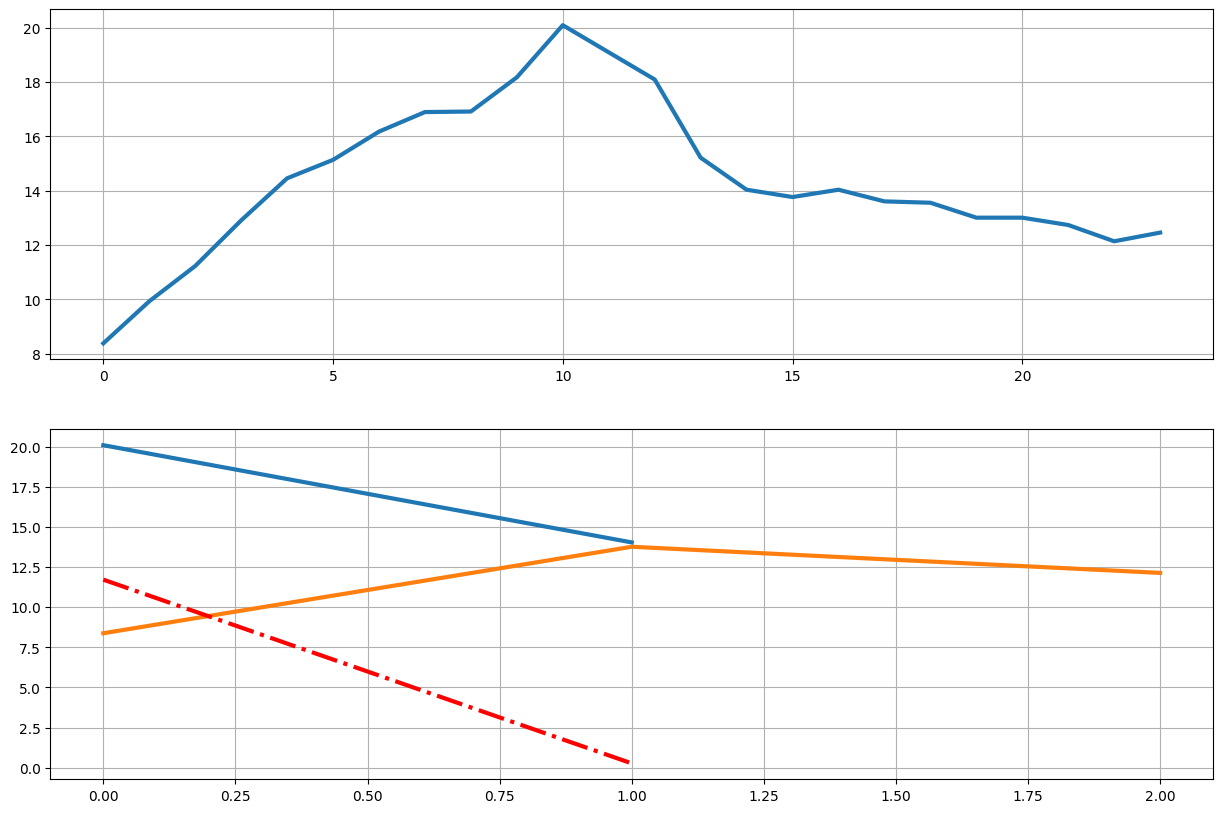

In [638]:
fig, (ax1,ax2) = plt.subplots(2,1)
# the size of A4 paper
fig.set_size_inches(15, 10)
ax1.plot(list(data.tail(24).temp),lw=3)
ax1.grid()
ax2.plot(_max,lw=3)
ax2.plot(_min,lw=3)
ax2.plot(_diff,'r-.',lw=3)
ax2.grid()

[] 0 [] 0
[] 0 [1] 1


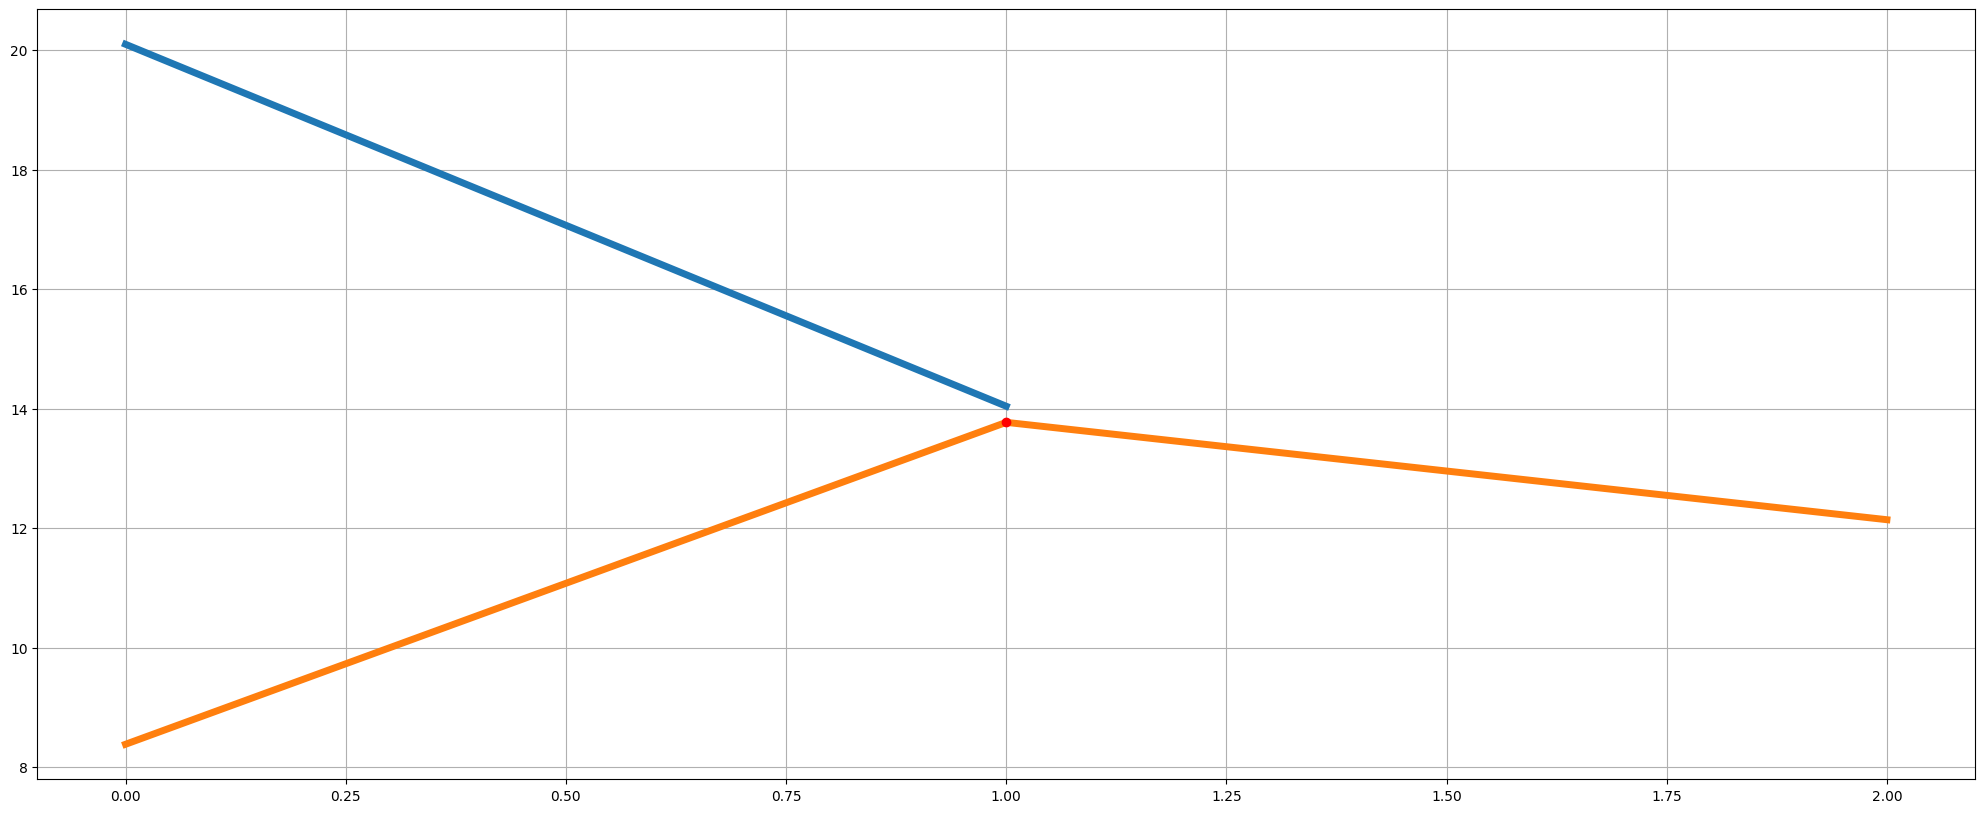

In [639]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
x =  range(len(_max))
plot_data(x,_max,lw=5)
x =  range(len(_min))
plot_data(x,_min,lw=5)
plt.grid()

In [640]:
liste = [10, 11, 15, 12, 9, 7, 8, 10, 13, 15, 18, 16, 12, 10, 7, 5, 6, 11, 14, 14]
diff(liste)


array([ 1,  4, -3, -3, -2,  1,  2,  3,  2,  3, -2, -4, -2, -3, -2,  1,  5,
        3,  0])

In [641]:
sign(diff(liste))


array([ 1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,
        1,  0])

In [642]:
diff(sign(diff(liste)))


array([ 0, -2,  0,  0,  2,  0,  0,  0,  0, -2,  0,  0,  0,  0,  2,  0,  0,
       -1])

In [643]:
diff(sign(diff(liste)))>0


array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False])

In [644]:
(diff(sign(diff(liste)))).nonzero()

(array([ 1,  4,  9, 14, 17]),)

# maximas, minimas

[ 5 15] 2 [ 2 10 18] 3


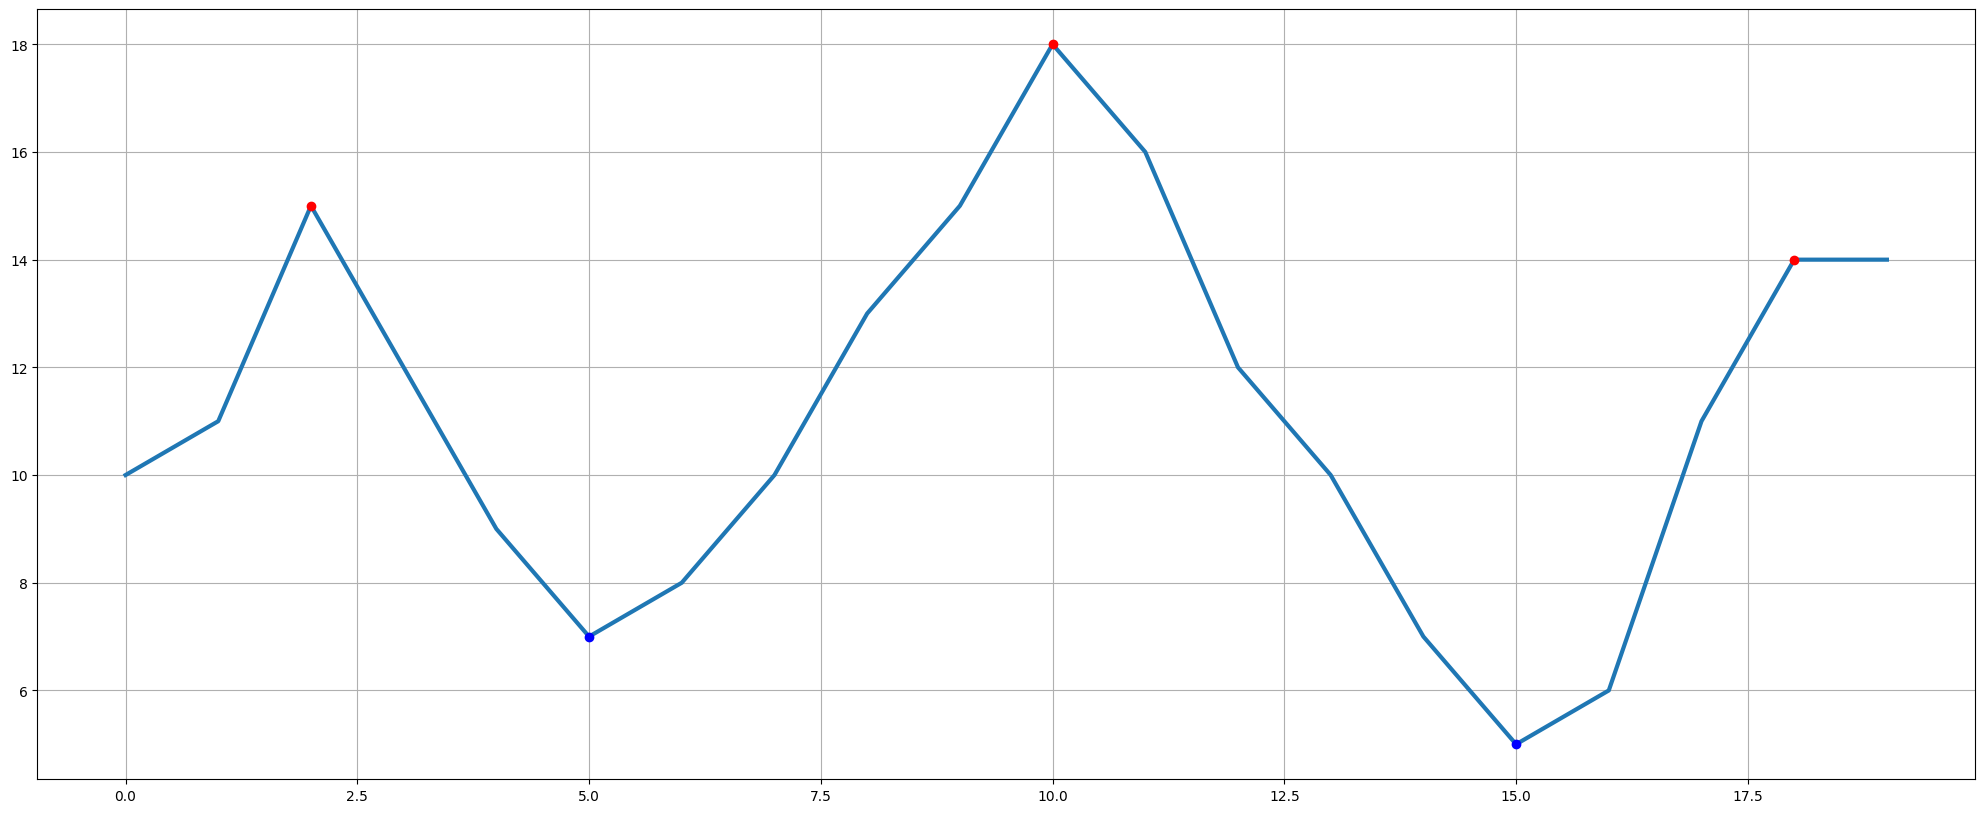

In [645]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
x = range(len(liste))
_data = liste
plot_data(x, _data)


In [646]:
date_time_str,days,interval

('16/04/24 07:00:00', 15, 12)

## last records

In [647]:
# 7 jours temp, mean
df = pd.DataFrame(data.tail(7*24)['temp'])
df['mean']= mean_days[-7*24:]
df

,temp,mean
8689,13.40,15.377917
8690,13.42,15.584583
8691,12.94,15.683333
8692,13.17,15.644583
8693,13.64,15.492917
...,...,...
8852,13.01,13.732500
8853,13.01,13.843333
8854,12.74,13.972083
8855,12.14,14.101667


# temperature, moyenne, variation

<Axes: >

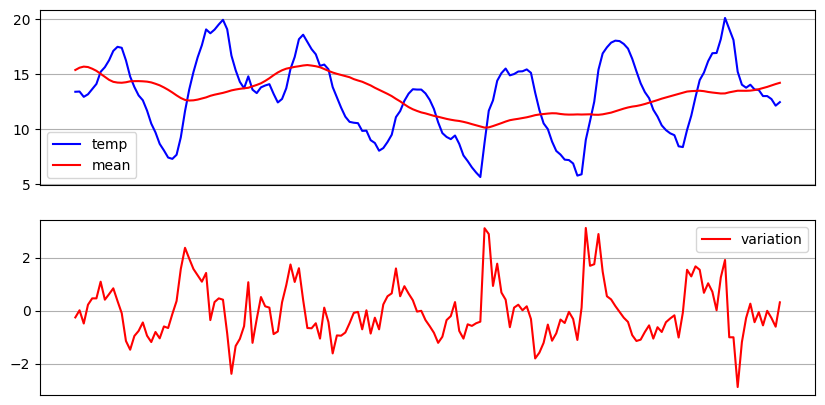

In [648]:
fig, axes = plt.subplots(nrows=2, ncols=1)

# plot temp, mean
df.plot(ax=axes[0],figsize=(10,5),color=['blue','red'],grid=True, legend=True,rot=45,xticks=[])
# 7 jours variation
data.tail(7*24)['variation'].plot(ax=axes[1],figsize=(10,5),color='red',grid=True, legend=True,rot=45,xticks=[])

In [649]:
data.tail(24*7)['temp'].max(),data.tail(24*7)['temp'].min()

(np.float64(20.100000000000023), np.float64(5.660000000000025))

In [650]:
def high_low(n):
    # variation 24 heures il y a n jours
    #n = 0
    l = len(data)
    e = n*24
    s = e+24

    high = round(data[l-s:l-e]['temp'].max(),2)
    low = round(data[l-s:l-e]['temp'].min(),2)
    delta = round(high - low,2)
    return high,low,delta

In [651]:
# max, min, delta sur n jours
n = 30
high_n = []
low_n = []
moy_n =  []
delta_n = []
for k in range(n):
    h,l,d = high_low(n-1-k)
    high_n.append(h)
    low_n.append(l)
    moy_n.append((h+l)/2)
    delta_n.append(d)
    print('J',-(n-1-k),h,l,d)


J -29 19.64 10.86 8.78
J -28 19.64 7.32 12.32
J -27 13.63 7.94 5.69
J -26 16.45 7.35 9.1
J -25 15.32 7.43 7.89
J -24 14.88 4.17 10.71
J -23 15.83 3.6 12.23
J -22 13.43 4.72 8.71
J -21 14.1 5.93 8.17
J -20 16.95 5.67 11.28
J -19 15.32 5.16 10.16
J -18 15.16 4.8 10.36
J -17 18.18 6.7 11.48
J -16 22.08 9.44 12.64
J -15 24.07 10.71 13.36
J -14 24.54 8.84 15.7
J -13 18.29 3.95 14.34
J -12 16.88 4.08 12.8
J -11 18.35 4.43 13.92
J -10 18.03 5.21 12.82
J -9 16.02 4.96 11.06
J -8 20.95 5.28 15.67
J -7 22.15 8.44 13.71
J -6 17.48 7.31 10.17
J -5 19.93 7.68 12.25
J -4 18.58 8.75 9.83
J -3 13.63 6.07 7.56
J -2 15.51 5.66 9.85
J -1 18.04 5.91 12.13
J 0 20.1 8.38 11.72


<Axes: >

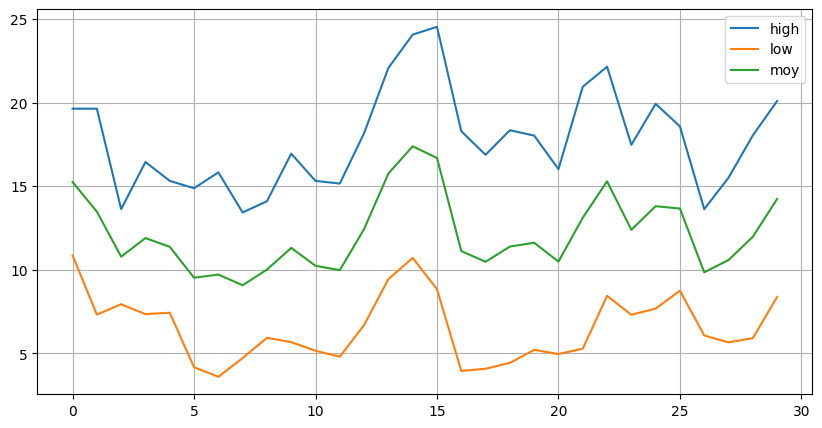

In [652]:
# pandas plot
df1 = pd.DataFrame()
df1['high'] = high_n
df1['low'] = low_n
df1['moy'] = moy_n
df1['delta'] = delta_n
df1[['high','low','moy']].plot(figsize=(10,5),grid=True, legend=True)

In [653]:
_data = list(df1['high'])
_max, _min = local_min_max(_data)
_max


[16.45, 15.83, 16.95, 24.54, 18.35, 22.15, 19.93]

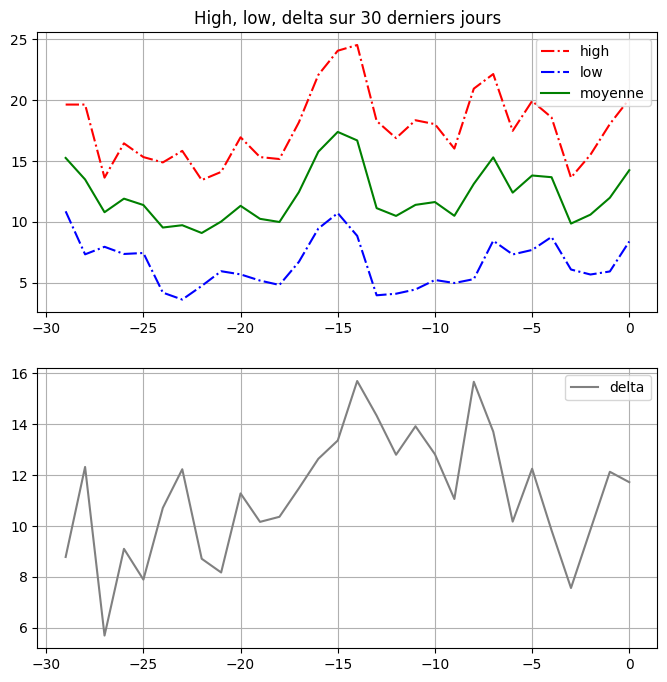

In [654]:
# plot lists
x = range(-29,1,1)
fig, (ax1, ax2) = plt.subplots(2,1)
# the size of A4 paper
fig.set_size_inches(8, 8)
ax1.set_title('High, low, delta sur '+str(n)+' derniers jours')
ax1.plot(x,high_n, '-.',color='red',label='high')
ax1.plot(x,low_n, '-.', color='blue',label = 'low')
ax1.plot(x,moy_n, color='green',label = 'moyenne')
ax1.grid()
ax1.legend()
#moy_n = [(h+l)/2 for h,l in zip(high_n,low_n)]

ax2.plot(x,delta_n,color='grey',label='delta')
ax2.grid()
ax2.legend()

In [655]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       8857 non-null   float64
 1   hours      8857 non-null   float64
 2   dates      8857 non-null   object 
 3   variation  8856 non-null   float64
 4   heures     8857 non-null   object 
 5   jours      8857 non-null   object 
dtypes: float64(3), object(3)
memory usage: 415.3+ KB


In [656]:
data_24 = data.tail(25)[['hours','dates','variation']]
#len(data_24),data_24


In [657]:
# plot X_axis
date_24 = np.array(data.tail(25)['hours'])
#date_24

In [658]:
# inutile ! il faut utiliser le champ data.hours
def mk_date2(data):
    str1, str2 = data_24.head(1)['dates'].values[0] , data_24.tail(1)['dates'].values[0] 
    print(str1,str2)
    return mdates.drange(datetime.strptime(str1, '%d/%m/%y %H:%M:%S'),datetime.strptime(str2, '%d/%m/%y %H:%M:%S'),dt.timedelta(hours=1))
#date_24 = mk_date2(data_24)

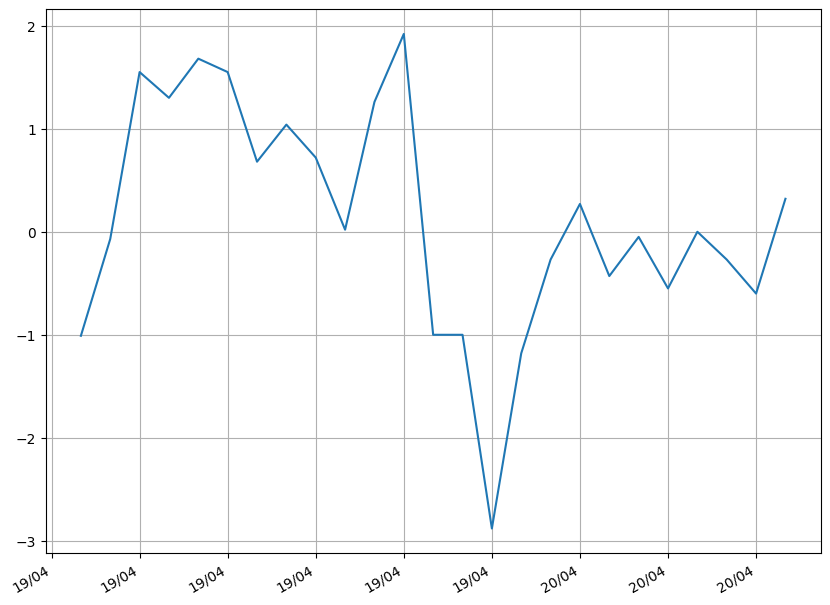

In [659]:
l = len(date_24)
data.tail(l)[['temp','variation']]
var = data.tail(l)[['variation']].values

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
plt.plot(date_24,var)
format_date()
#plt.grid()

In [660]:
w = int(24*days)
days,data.tail(w)['temp'].max(), data.tail(w)['temp'].min()


(15, np.float64(24.54000000000002), np.float64(3.9500000000000455))

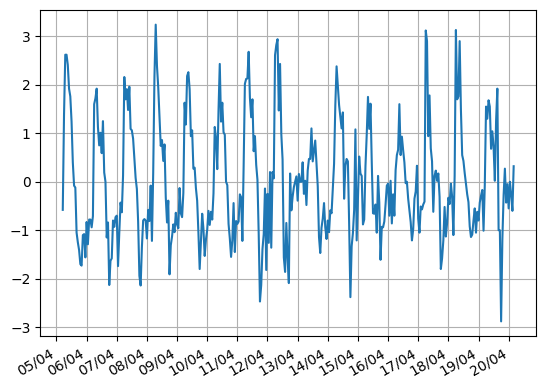

In [661]:
#data['variation'].tail(w).plot()
plt.plot(data['hours'].tail(w),data['variation'].tail(w))
format_date(24)

### date pour les temp max, min

In [662]:
d_max = data.tail(w)['temp'].max()
d_max, data[data['temp']==data.tail(w)['temp'].max()]['dates']

(np.float64(24.54000000000002),
 8505    05/04/25 16:00:00
 Name: dates, dtype: object)

In [663]:
d_min = data.tail(w)['temp'].min()
d_min, data[data['temp']==data.tail(w)['temp'].min()]['dates']

(np.float64(3.9500000000000455),
 7099    06/02/25 02:00:00
 7100    06/02/25 03:00:00
 7239    11/02/25 22:00:00
 7272    13/02/25 07:00:00
 7304    14/02/25 15:00:00
 7406    18/02/25 21:00:00
 7920    12/03/25 07:00:00
 8544    07/04/25 07:00:00
 Name: dates, dtype: object)

In [664]:
data.tail(w)['temp'].describe()

count    360.000000
mean      12.990806
std        4.274128
min        3.950000
25%        9.645000
50%       13.285000
75%       16.120000
max       24.540000
Name: temp, dtype: float64

In [665]:
from  datetime import datetime
#matplotlib.dates.date2num(hours)
#then.isoformat(),round(temp[-1],2)
today = datetime.now()
today.strftime('%d/%m/%y %H:%M:%S'),round(temp[-1],2)


('20/04/25 07:47:13', np.float64(12.46))

In [666]:
# current date and time
ts = datetime.timestamp(today)
ts

1745128033.525746